# Import Libraries

In [1]:
!pip install -q gradio

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import random
import gradio as gr

## Load datasets

In [3]:
data = tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Display 9 images on random from dataset

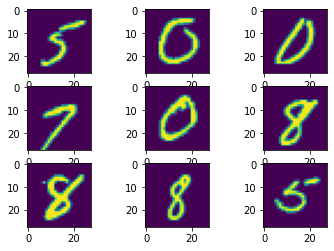

In [4]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    j = random.randint(1, 1000)
    plt.imshow(train_images[j])

## See the shape of dataset

In [5]:
print(train_images.shape)#60000 test images
print(test_images.shape) #10000 training images

(60000, 28, 28)
(10000, 28, 28)


## Normalise the images

In [6]:
train_images = train_images/255 
test_images = test_images/255

## Create neural network model

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Optimizer and loss functions

In [8]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer =Adam() , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(test_images, test_labels),
          verbose=1)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2560 - accuracy: 0.9265 - val_loss: 0.1465 - val_accuracy: 0.9558
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1125 - accuracy: 0.9668 - val_loss: 0.0954 - val_accuracy: 0.9711
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0792 - accuracy: 0.9762 - val_loss: 0.0881 - val_accuracy: 0.9739
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0590 - accuracy: 0.9826 - val_loss: 0.0769 - val_accuracy: 0.9773
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0808 - val_accuracy: 0.9759
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0722 - val_accuracy: 0.9787
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0811 - val_accuracy:

3
7
2
2
5
6
5
8
6


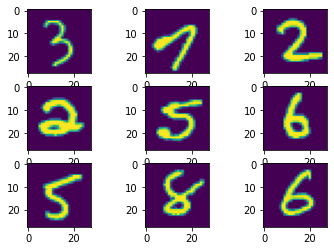

In [11]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    j = random.randint(1, 1000)
    plt.imshow(test_images[j])
    prediction = model.predict(test_images)
    print(np.argmax(prediction[j]))

In [12]:
def classify(image):
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

In [13]:
sketchpad = gr.inputs.Sketchpad()
label = gr.outputs.Label(num_top_classes=3)
interface = gr.Interface(classify, sketchpad, label, live=True, capture_session=True)

# Sketchpad to predict output

In [ ]:
interface.launch(share=True);